In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, LabelEncoder
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler


In [56]:
data = pd.read_csv("Final_Data.csv")

In [57]:
data.drop(columns=["Company_Name", "Unnamed: 0", "Unnamed: 0.1"], inplace=True)

In [58]:
data.head()

,Desingations_CEO,Desingations_Founder,Desingations_HR,Desingations_Head_engg,Desingations_Missing,Desingations_VP,Contact Status,Noida,Delhi,Gurgaon,...,javacloud,softwaredevelopmenttest,ionicapp,traineesoftwaretesting,traineesoftware,tester,trainee,magento,uideveloper,Company_Type
0,0,1,0,0,0,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,1,0,0,0,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,1,0,0,0,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0,1,0,0,0,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,1,0,0,0,0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [59]:
X = pd.DataFrame(data.drop(columns="Contact Status"))
y = pd.DataFrame(data["Contact Status"])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
def random_forest(X, y):
    accuracy = 0
    f1 = 0 
    score = 0
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    score = classifier.score(X_test,y_test)
    
    return cm, accuracy, f1, score


# GridSearchCV on Random Forest

In [29]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

rfc1.fit(X_train, y_train)

pred=rfc1.predict(X_test)

accuracy_score(y_test,pred)

0.9009779951100244

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[1474,    0],
       [ 162,    0]])

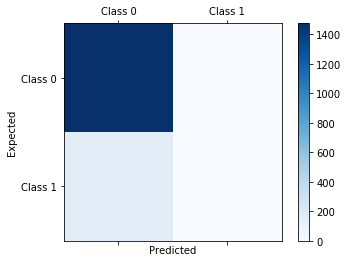

In [44]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

* __For Contact_Status__ 
    * __0__ - No respose from client
    * __1__ - Client responded 

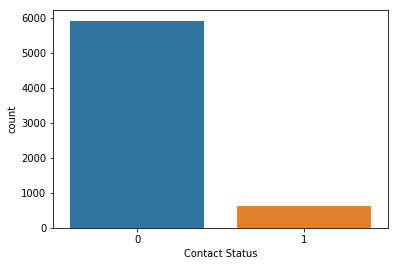

In [33]:
ax = sb.countplot(x="Contact Status", data=data)

In [51]:
Responded, No_Response = data['Contact Status'].value_counts()

percent_Responded = (Responded / len(data)) * 100
percent_Not_Responded = (No_Response / len(data)) * 100

percent_Responded, percent_Not_Responded

(90.44780681644505, 9.552193183554945)

* __Here we can see that only 9.5% conpanies responded and 90% companies ignored. So, while applying algorithms we'll face accuracy paradox. To avoid this we'll need to do Resampling by balancing the imbalanced data. We can do that by adding some data into minority cluster(over-sampling) and removing some data from majority cluster(under-sampling).__

# Resampling

In [47]:
# Class count
count_class_0, count_class_1 = data['Contact Status'].value_counts()

# Divide by class
df_class_0 = data[data['Contact Status'] == 0]
df_class_1 = data[data['Contact Status'] == 1]

In [52]:
count_class_0, count_class_1

(5918, 625)

# Random under-sampling

In [84]:
df_class_0_under = df_class_0.sample(count_class_1)
df_class_0_under.shape

(625, 255)

Random under-sampling:
1    625
0    625
Name: Contact Status, dtype: int64


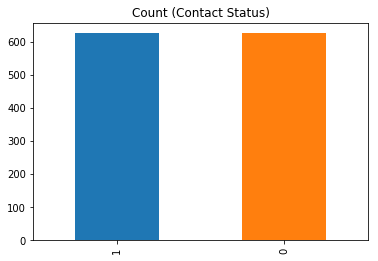

In [85]:
new_df = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(new_df['Contact Status'].value_counts())

new_df['Contact Status'].value_counts().plot(kind='bar', title='Count (Contact Status)')

In [64]:
new_df.shape

(1250, 255)

In [66]:
X = pd.DataFrame(new_df.drop(columns= "Contact Status"))
y = pd.DataFrame(new_df["Contact Status"])

In [80]:
cm, accuracy_score_1, f1_score_1, score_1 = random_forest(X, y)

In [68]:
cm

array([[78, 65],
       [71, 99]])

In [81]:
accuracy_score_1, f1_score_1, score_1

(0.5654952076677316, 0.592814371257485, 0.5654952076677316)

# Random Over Sampling 

Random over-sampling:
1    5918
0    5918
Name: Contact Status, dtype: int64


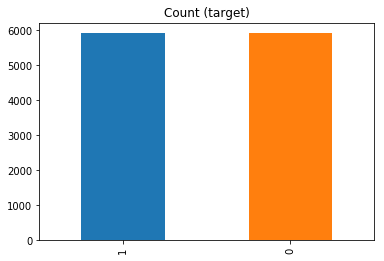

In [88]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
new_df = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(new_df["Contact Status"].value_counts())

new_df["Contact Status"].value_counts().plot(kind='bar', title='Count (target)');

In [89]:
X = pd.DataFrame(new_df.drop(columns= "Contact Status"))
y = pd.DataFrame(new_df["Contact Status"])

cm, accuracy_score_1, f1_score_1, score_1 = random_forest(X, y)
cm, accuracy_score_1, f1_score_1, score_1

(array([[ 936,  499],
        [ 242, 1282]]),
 0.7495775599864819,
 0.7757942511346444,
 0.7495775599864819)